# Forest Cover Type Prediction
<div class="alert alert-block alert-info">
Final Project for DTSA 5510 (Unsupervised Algorithms in Machine Learning)<br>
by Yasushi Yamanaka (yasushi.yamanaka@colorado.edu)
</div>

## 1. Introduction

### 1.1 Background
<font color='red'>Statement from the website</font>: *In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.*

*This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.*

### 1.2 Objectives
This project is about building machine learning models on forest type classification. The data is originated from Kaggle and the problem belongs to <font color='red'>*multiclass classification problem*</font>. Different classification algorithms (supervised learning, unsupervised learning, and semi-supervised Learning) will be tested and compared in this project. Algorithms used in this study include <font color='red'>Principle Component Analysis, t-SNE, Non-negative Matrix Factorization, K-Means, Logistic Regression, SVM, and Random Forest Classification</font>. Comparison will be based on classification evaluation metrics (accuracy and confusion matrix). Feasibility of using unsupervised learning methods to enhance supervised learning models (semi-supervised learning) will also be evaluated. In addition, data handling and analysis techniques required for model training will be demostrated.

### 1.3 Data Source

- Kaggle.com (2019). Playground Prediction Competition - Forest Cover Type Prediction. https://www.kaggle.com/competitions/forest-cover-type-prediction

Importing required packages:

In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.discriminant_analysis
import sklearn.tree
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.manifold
import sklearn.neighbors
import sklearn.cluster
import yellowbrick.classifier

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
%%html
<style>
table {float:left}
</style>

## 2. Data Loading

### 2.1 Training vs Testing Data
There are two files <font color="blue">train.csv</font> and <font color="blue">test.csv</font> from the data soucre. The former has target labels and the latter hasn't. Since we don't have the labels of the test data, we will later split the training data set into training and test sets for model evaluation. It seems that the data had been cleaned and all columns have numeric types and without null value.

In [3]:
df = pd.read_csv("data/forest-cover-type-prediction/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

### 2.2 Data Description (training data set)
- File Size: 1.93MB
- Number of Table: 1
- Number of rows: 15120
- Column Counts: 56
- Numerical Column Counts: 11
- Categorical Column Counts: 44
- Column of Target Variable: Cover_Type

Cover_Type values: 1 - Spruce/Fir, 2 - Lodgepole Pine, 3 - Ponderosa Pine, 4 - Cottonwood/Willow, 5 - Aspen, 6 - Douglas-fir, 7 - Krummholz


 | Column Name | Description |
 |:-|:- |
 | Elevation | Elevation in meters |
 | Aspect | Aspect in degrees azimuth |
 | Slope | Slope in degrees | 
 | Horizontal_Distance_To_Hydrology | Horz Dist to nearest surface water features | 
 | Vertical_Distance_To_Hydrology | Vert Dist to nearest surface water features | 
 | Horizontal_Distance_To_Roadways | Horz Dist to nearest roadway | 
 | Hillshade_9am (0 to 255 index) | Hillshade index at 9am, summer solstice | 
 | Hillshade_Noon (0 to 255 index) | Hillshade index at noon, summer solstice | 
 | Hillshade_3pm (0 to 255 index) | Hillshade index at 3pm, summer solstice | 
 | Horizontal_Distance_To_Fire_Points | Horz Dist to nearest wildfire ignition points | 
 | Wilderness_Area1 | Rawah Wilderness Area | 
 | Wilderness_Area2 | Neota Wilderness Area | 
 | Wilderness_Area3 | Comanche Peak Wilderness Area | 
 | Wilderness_Area4 | Cache la Poudre Wilderness Area | 
 | Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony | 
 | Soil_Type2 | Vanet - Ratake families complex, very stony |
 | Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly | 
 | Soil_Type4 | Ratake family - Rock outcrop complex, rubbly | 
 | Soil_Type5 | Vanet family - Rock outcrop complex complex, rubbly | 
 | Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony | 
 | Soil_Type7 | Gothic family | 
 | Soil_Type8 | Supervisor - Limber families complex | 
 | Soil_Type9 | Troutville family, very stony | 
 | Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly | 
 | Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly | 
 | Soil_Type12 | Legault family - Rock land complex, stony | 
 | Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly | 
 | Soil_Type14 | Pachic Argiborolis - Aquolis complex | 
 | Soil_Type15 | unspecified in the USFS Soil and ELU Survey | 
 | Soil_Type16 | Cryaquolis - Cryoborolis complex | 
 | Soil_Type17 | Gateview family - Cryaquolis complex | 
 | Soil_Type18 | Rogert family, very stony | 
 | Soil_Type19 | Typic Cryaquolis - Borohemists complex | 
 | Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex | 
 | Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex | 
 | Soil_Type22 | Leighcan family, till substratum, extremely bouldery | 
 | Soil_Type23 | Leighcan family, till substratum - Typic Cryaquolls complex | 
 | Soil_Type24 | Leighcan family, extremely stony | 
 | Soil_Type25 | Leighcan family, warm, extremely stony | 
 | Soil_Type26 | Granile - Catamount families complex, very stony | 
 | Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony | 
 | Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony | 
 | Soil_Type29 | Como - Legault families complex, extremely stony | 
 | Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony | 
 | Soil_Type31 | Leighcan - Catamount families complex, extremely stony | 
 | Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony | 
 | Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony | 
 | Soil_Type34 | Cryorthents - Rock land complex, extremely stony | 
 | Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex | 
 | Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony | 
 | Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony | 
 | Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony | 
 | Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony | 
 | Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony | 

Grouping columns into numerical and categorical:

In [4]:
numeric_columns = df.columns[1:11].to_list()
cat_columns = df.columns[11:-1].to_list()

### 2.3 Histogram of Cover Type
Examine distribution of the label values. The data is equally distributed hence no special consideration is needed for imbalance.

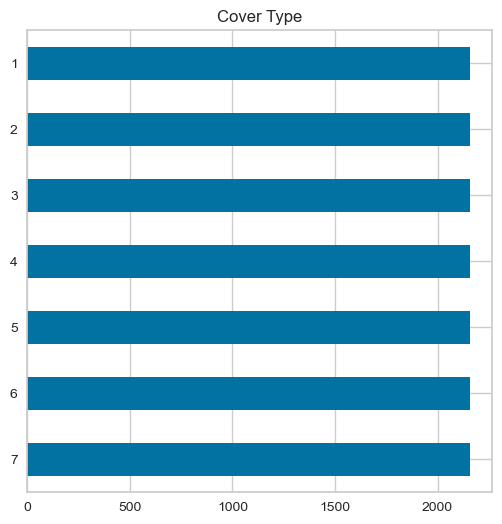

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
df.Cover_Type.value_counts().sort_index(ascending=False).plot.barh(ax=ax, title="Cover Type");

### 2.4 Correlation Analysis
- Some of the features are mutually correlated
- However, most of the models in this study are not sensitive to multicollinearity so we will leave them as they are

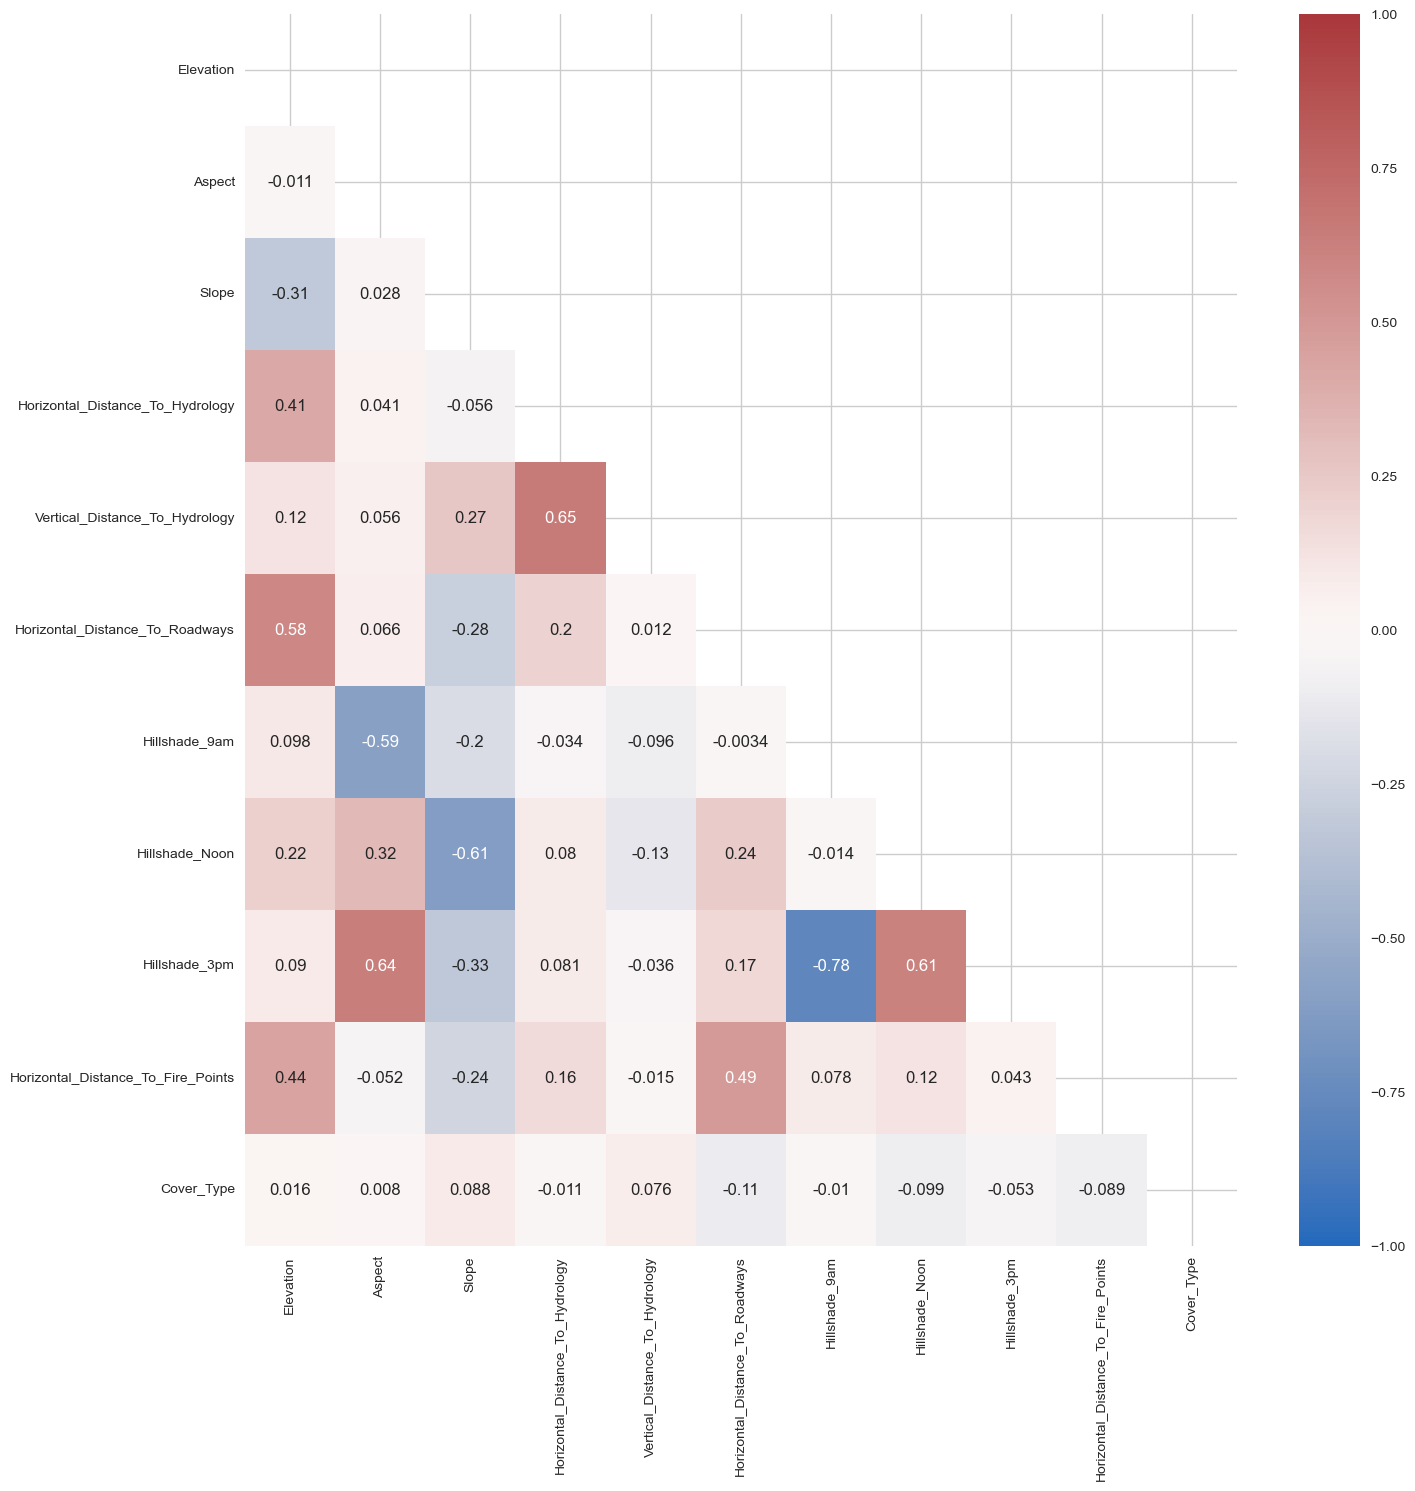

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(df[numeric_columns+["Cover_Type"]].corr(), 
            mask=np.triu(np.ones_like(df[numeric_columns+["Cover_Type"]].corr(), dtype=bool)), 
            annot=True, vmin=-1, vmax=1, cmap="vlag");

### 2.5 Boxplots for Numerical Features
- Values look like within reasonable range
- All features except Vertical_Distance_To_Hydrology are non-negative

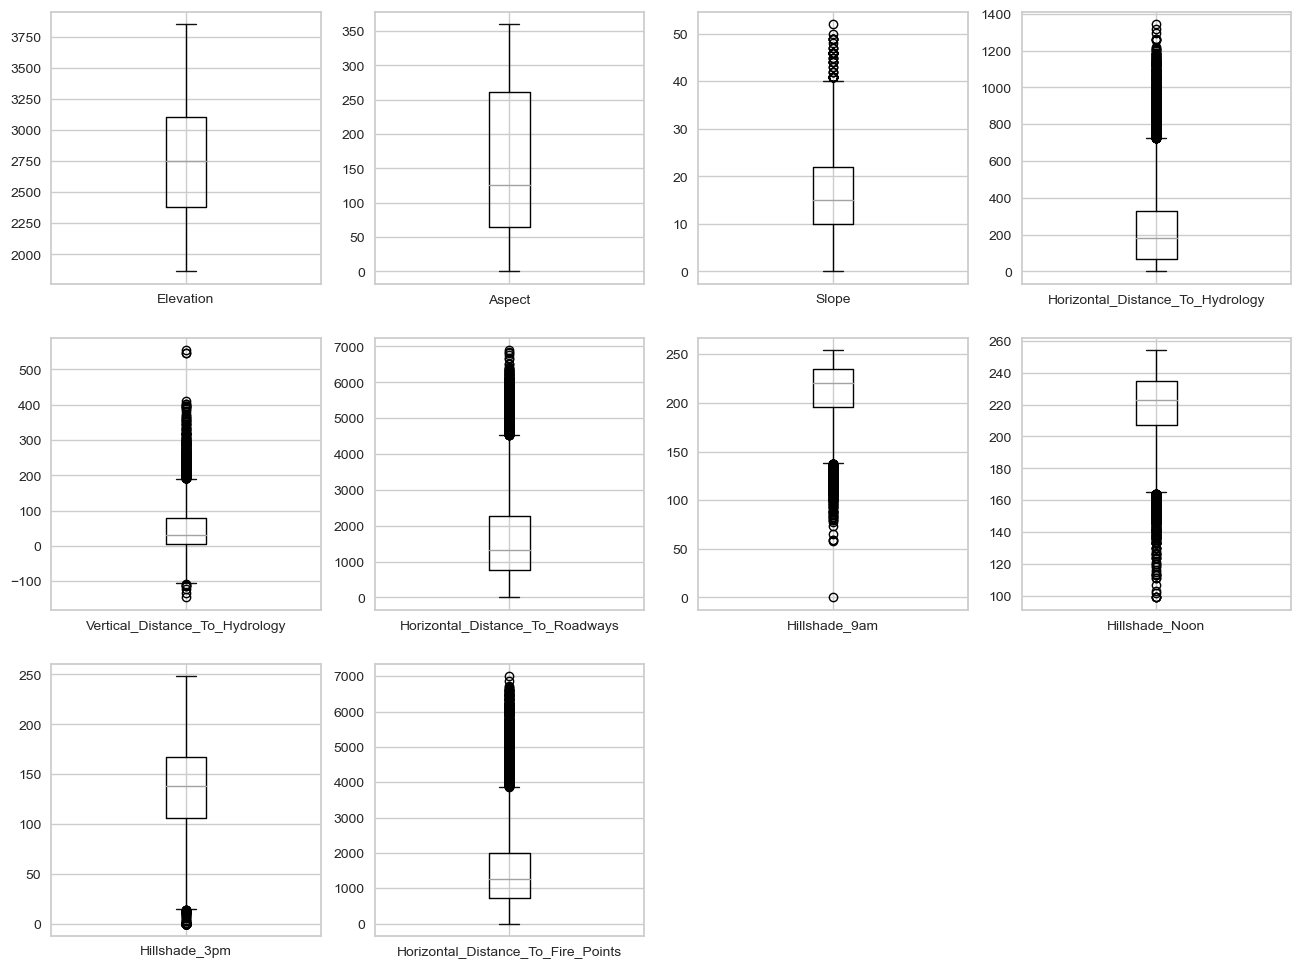

In [7]:
fig, ax = plt.subplots(3, 4, figsize=(16, 12))
for n, p in enumerate(numeric_columns):
    i, j = n//4, n%4
    df.boxplot(column=p, ax=ax[i][j])

ax[2][2].set_axis_off()
ax[2][3].set_axis_off()

### 2.6 Histograms for Categorical Features
- Many of the feature values are skewed
- Soil_Type7 and Soil_Type15 are all zeros

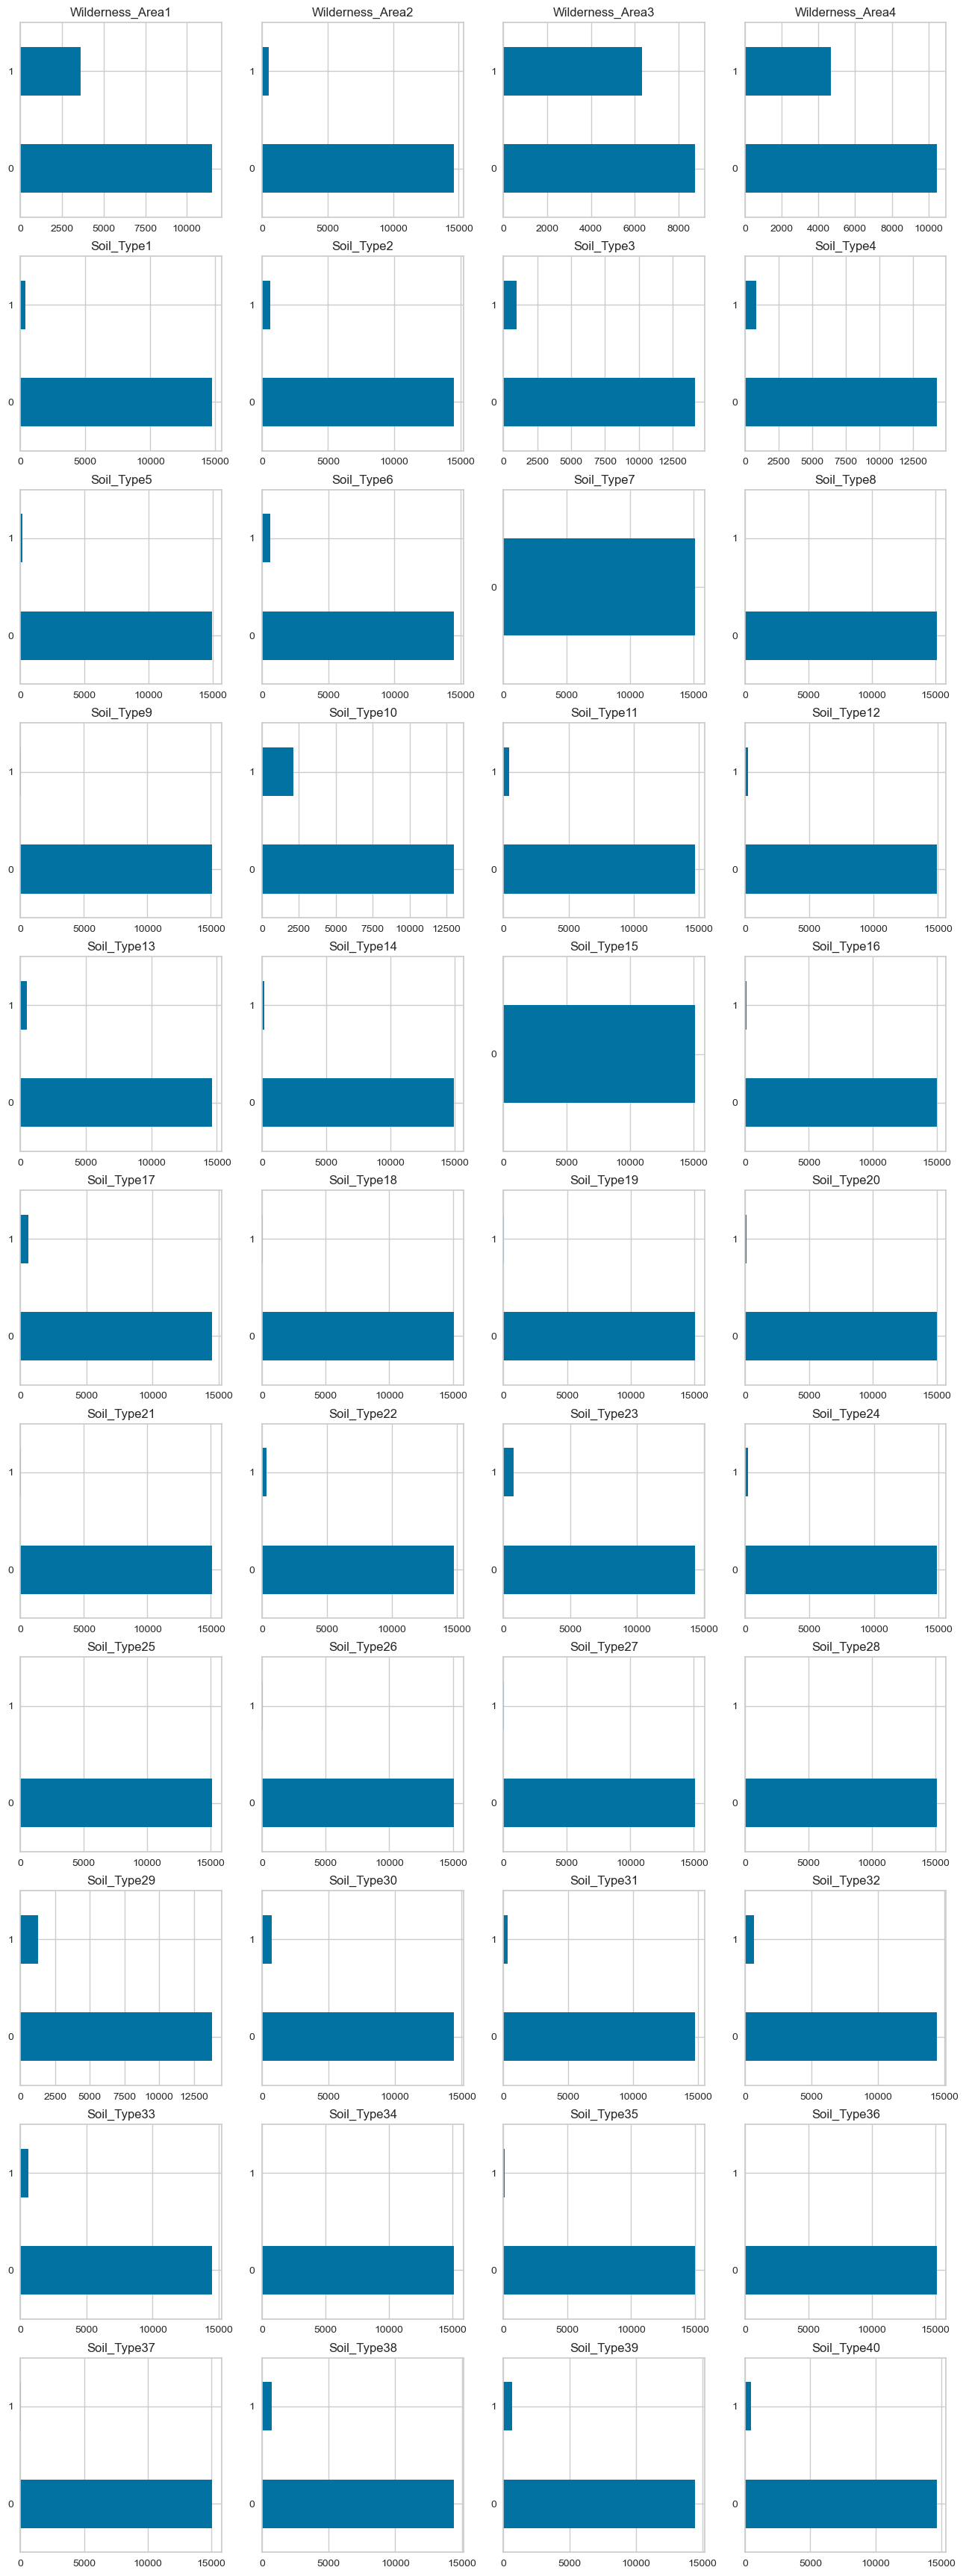

In [8]:
fig, ax = plt.subplots(11, 4, figsize=(16, 44))
for n, p in enumerate(cat_columns):
    i, j = n//4, n%4
    df[p].value_counts().plot.barh(ax=ax[i][j], title=p)

## 3. Data Preparation

### 3.1 Data Cleaning and Transforming
* Columns Soil_Type7 and Soil_Type15 are dropped since they contain only zeros
* MinMaxScaler is used for normailzation. One of the benefits is that all values after transformation will be non-negative, so we can apply algorithm like Non-negative Matrix Factorization in the downstream process
* Dataset is separated into training and test set

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()
X = np.concatenate([scaler.fit_transform(df[numeric_columns]), df[cat_columns].drop(columns=["Soil_Type7", "Soil_Type15"])], axis=1)
y = df["Cover_Type"].to_numpy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1301, stratify=y)
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

## 4. Exploratory Data Analysis
We apply dimensionality reduction technique (t-SNE, t-Distributed Stochastic Neighbor Embedding) to project data into two dimensional space for visualization.

### 4.1 Principal Component Analysis
Data don't separate well in the reduced 2-D space

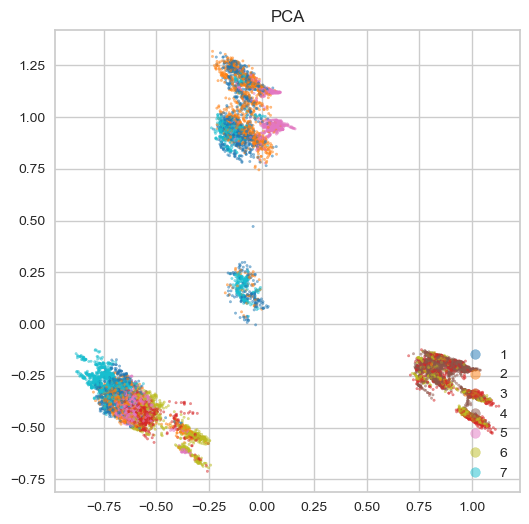

In [10]:
pca = sklearn.decomposition.PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                c=y_train, s=3, alpha=0.5, cmap="tab10");
ax.legend(handles=sc.legend_elements()[0], labels=set(y_train), loc="lower right");
ax.set_title("PCA");

### 4.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a dimensionality reduction algorithm used for visualizing high-dimensional data in a lower-dimensional space while preserving its inherent structure. The algorithm constructs probability distributions for pairs of data points, both in the original high-dimensional space and in the lower-dimensional space. It aims to minimize the divergence between these distributions, effectively mapping similar points closer together and dissimilar points farther apart. By focusing on pairwise relationships, t-SNE can unveil clusters, subclusters, and nonlinear relationships that might be hidden in the original data.

<font color="red">t-SNE did a slightly better job than PCA in visualising our data. A few clusters can be identified but it is still inadequate for our classification requirement.</font>


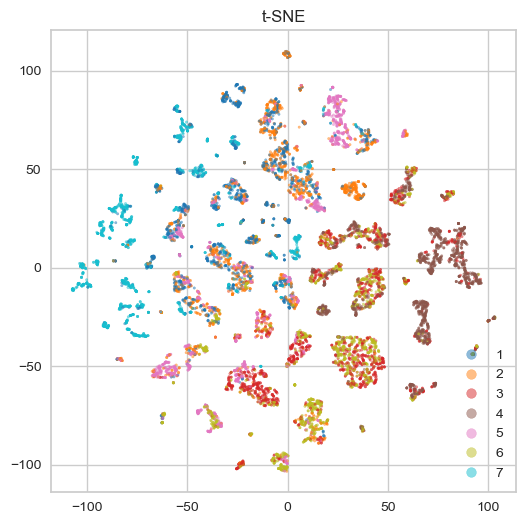

In [11]:
tsne = sklearn.manifold.TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], 
                c=y_train, s=3, alpha=0.5, cmap="tab10");
ax.legend(handles=sc.legend_elements()[0], labels=set(y_train), loc="lower right");
ax.set_title("t-SNE");

## 5. Modelling
We first apply both unsupervised and supervised learning algorithms directly for classification and compare their performance. Here are the planned models:
1. Non-negative Matrix Factorization (unsupervised)
2. K-Means (unsupervised)
2. Logistic Regression (supervised)
3. SVM (supervised)
4. Random Forest (supervised)

### 5.1 NMF

In [12]:
W = sklearn.decomposition.NMF(n_components=7, max_iter=1000).fit_transform(X)
y_train_pred = W[:len(X_train), :].argmax(axis=1)
y_test_pred = W[len(X_train):, :].argmax(axis=1)

max_train_acc, mapping = 0, None
for p in itertools.permutations(range(1,8)):
    y_transformed = [p[idx] for idx in y_train_pred]
    acc = np.mean(y_train==y_transformed)
    if (acc > max_train_acc):
        max_train_acc = acc
        mapping = p

max_test_acc = np.mean([mapping[idx] for idx in y_test_pred]==y_test)
print("Training accuracy = {:.2f}%, test accuracy = {:.2f}%".format(max_train_acc*100, max_test_acc*100))

Training accuracy = 40.75%, test accuracy = 40.24%


### 5.2 K-Means

In [13]:
K = sklearn.cluster.KMeans(n_clusters=7, max_iter=1000).fit(X)
y_train_pred = K.labels_[:len(X_train)]
y_test_pred = K.labels_[len(X_train):]

max_train_acc, mapping = 0, None
for p in itertools.permutations(range(1,8)):
    y_transformed = [p[idx] for idx in y_train_pred]
    acc = np.mean(y_train==y_transformed)
    if (acc > max_train_acc):
        max_train_acc = acc
        mapping = p

max_test_acc = np.mean([mapping[idx] for idx in y_test_pred]==y_test)
print("Training accuracy = {:.2f}%, test accuracy = {:.2f}%".format(max_train_acc*100, max_test_acc*100))

Training accuracy = 35.31%, test accuracy = 35.35%


<font color="red">Unsupervised methods don't produce acceptable accuracy in our dataset. It is possibly due to high proportion of the features are categorical. Both NMF and K-Means are not good at processing categorical data.</font>

### 5.3 Logistic Regression

In [14]:
lg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)
print("Training accuracy = {:.2f}%".format(lg.score(X_train, y_train)*100))

Training accuracy = 68.67%


Optimizing hyperparameters:

In [15]:
lg_param_grid = {"penalty": ["l1", "l2"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "solver": ["liblinear", "saga"]}
lg_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.linear_model.LogisticRegression(),
                                                param_grid=lg_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
lg_grid.fit(X_train, y_train)
print("Optimized model: " + str(lg_grid.best_estimator_))
best_lg_clf = lg_grid.best_estimator_.fit(X_train, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_lg_clf.score(X_train, y_train)*100, 
                                                                                        best_lg_clf.score(X_test, y_test)*100))

Optimized model: LogisticRegression(C=10, penalty='l1', solver='saga')
Optimized training accuracy = 71.67%, optimized test accuracy = 70.37%


### 5.3 SVM

In [16]:
svm = sklearn.svm.SVC().fit(X_train, y_train)
print("Training accuracy = {:.2f}%".format(svm.score(X_train, y_train)*100))

Training accuracy = 71.86%


Optimizing hyperparameters:

In [17]:
svm_param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "gamma": ["scale","auto"]}
svm_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.svm.SVC(), 
                                                param_grid=svm_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
svm_grid.fit(X_train, y_train)
print("Optimized model: " + str(svm_grid.best_estimator_))
best_svm_clf = svm_grid.best_estimator_.fit(X_train, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_svm_clf.score(X_train, y_train)*100, 
                                                                                        best_svm_clf.score(X_test, y_test)*100))

Optimized model: SVC(C=10, kernel='poly')
Optimized training accuracy = 80.25%, optimized test accuracy = 77.68%


### 5.5 Random Forest

In [18]:
rf = sklearn.ensemble.RandomForestClassifier().fit(X_train, y_train)
print("Training accuracy = {:.2f}%".format(rf.score(X_train, y_train)*100))

Training accuracy = 100.00%


Optimizing hyperparameters:

In [19]:
rf_param_grid = {"n_estimators": [100, 200, 300, 500], "max_depth": [2, 3, 5, 10, 20]}
rf_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid=rf_param_grid, scoring="accuracy", n_jobs=-1, cv=5)
rf_grid.fit(X_train, y_train)
print("Optimized model: " + str(rf_grid.best_estimator_))
best_rf_clf = rf_grid.best_estimator_.fit(X_train, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_rf_clf.score(X_train, y_train)*100, 
                                                                                        best_rf_clf.score(X_test, y_test)*100))

Optimized model: RandomForestClassifier(max_depth=20, n_estimators=500)
Optimized training accuracy = 99.83%, optimized test accuracy = 86.21%


### 5.6 Confusion Matrices
Random Forest performs the best among all three supervised models, both in terms of accuracy and confusion matrix.

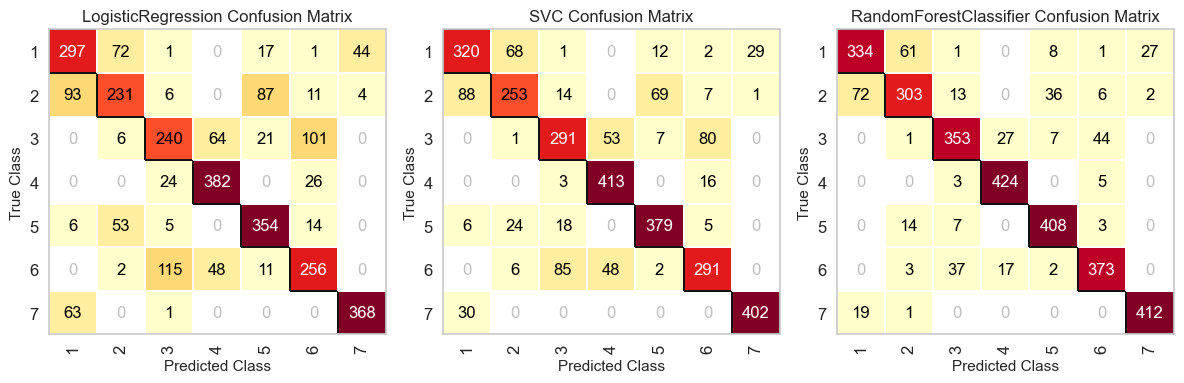

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plt.sca(axes[0]);
yellowbrick.classifier.confusion_matrix(best_lg_clf, X_train, y_train, X_test, y_test, 
                                        is_fitted=True, show=False);
plt.sca(axes[1]);
yellowbrick.classifier.confusion_matrix(best_svm_clf, X_train, y_train, X_test, y_test,
                                        is_fitted=True, show=False);
plt.sca(axes[2]);
yellowbrick.classifier.confusion_matrix(best_rf_clf, X_train, y_train, X_test, y_test, 
                                        is_fitted=True, show=False);

### 5.7 Semi-supervised Learning
In this part of the study, we combine unsupervised and supervied learning algorithm to see if it can bring better result. We have two approaches here:
- <font color="blue">transform data (training + test) through PCA and then learned by supervised models</font>
- <font color="blue">transform data (training + test) through MNF and then learned by supervised models</font>

PCA + supervised learning:

In [21]:
X_pca = sklearn.decomposition.PCA(n_components=52).fit_transform(X)
X_train_pca, X_test_pca = X_pca[:len(X_train), :], X_pca[len(X_train):, :]

In [22]:
lg_param_grid = {"penalty": ["l1", "l2"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "solver": ["liblinear", "saga"]}
lg_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.linear_model.LogisticRegression(),
                                                param_grid=lg_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
lg_grid.fit(X_train_pca, y_train)
print("Optimized model: " + str(lg_grid.best_estimator_))
best_lg_clf = lg_grid.best_estimator_.fit(X_train_pca, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_lg_clf.score(X_train_pca, y_train)*100, 
                                                                                        best_lg_clf.score(X_test_pca, y_test)*100))

Optimized model: LogisticRegression(C=10, penalty='l1', solver='saga')
Optimized training accuracy = 71.68%, optimized test accuracy = 70.44%


In [23]:
svm_param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "gamma": ["scale","auto"]}
svm_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.svm.SVC(), 
                                                param_grid=svm_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
svm_grid.fit(X_train_pca, y_train)
print("Optimized model: " + str(svm_grid.best_estimator_))
best_svm_clf = svm_grid.best_estimator_.fit(X_train_pca, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_svm_clf.score(X_train_pca, y_train)*100, 
                                                                                        best_svm_clf.score(X_test_pca, y_test)*100))

Optimized model: SVC(C=10, kernel='poly')
Optimized training accuracy = 82.50%, optimized test accuracy = 79.40%


In [24]:
rf_param_grid = {"n_estimators": [100, 200, 300, 500], "max_depth": [2, 3, 5, 10, 20]}
rf_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid=rf_param_grid, scoring="accuracy", n_jobs=-1, cv=5)
rf_grid.fit(X_train_pca, y_train)
print("Optimized model: " + str(rf_grid.best_estimator_))
best_rf_clf = rf_grid.best_estimator_.fit(X_train_pca, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_rf_clf.score(X_train_pca, y_train)*100, 
                                                                                        best_rf_clf.score(X_test_pca, y_test)*100))

Optimized model: RandomForestClassifier(max_depth=20, n_estimators=300)
Optimized training accuracy = 99.83%, optimized test accuracy = 86.08%


NMF + supervised learning:

In [25]:
W = sklearn.decomposition.NMF(n_components=52, max_iter=10000).fit_transform(X)
X_train_nmf, X_test_nmf = W[:len(X_train), :], W[len(X_train):, :]

In [26]:
lg_param_grid = {"penalty": ["l1", "l2"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "solver": ["liblinear", "saga"]}
lg_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.linear_model.LogisticRegression(),
                                                param_grid=lg_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
lg_grid.fit(X_train_nmf, y_train)
print("Optimized model: " + str(lg_grid.best_estimator_))
best_lg_clf = lg_grid.best_estimator_.fit(X_train_nmf, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_lg_clf.score(X_train_nmf, y_train)*100, 
                                                                                        best_lg_clf.score(X_test_nmf, y_test)*100))

Optimized model: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Optimized training accuracy = 67.49%, optimized test accuracy = 66.47%


In [27]:
svm_param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"], 
                  "C": [0.001, 0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10], 
                  "gamma": ["scale","auto"]}
svm_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.svm.SVC(), 
                                                param_grid=svm_param_grid, 
                                                scoring="accuracy", n_jobs=-1, cv=5)
svm_grid.fit(X_train_nmf, y_train)
print("Optimized model: " + str(svm_grid.best_estimator_))
best_svm_clf = svm_grid.best_estimator_.fit(X_train_nmf, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_svm_clf.score(X_train_nmf, y_train)*100, 
                                                                                        best_svm_clf.score(X_test_nmf, y_test)*100))

Optimized model: SVC(C=10)
Optimized training accuracy = 71.92%, optimized test accuracy = 70.17%


In [28]:
rf_param_grid = {"n_estimators": [100, 200, 300, 500], "max_depth": [2, 3, 5, 10, 20]}
rf_grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid=rf_param_grid, scoring="accuracy", n_jobs=-1, cv=5)
rf_grid.fit(X_train_nmf, y_train)
print("Optimized model: " + str(rf_grid.best_estimator_))
best_rf_clf = rf_grid.best_estimator_.fit(X_train_nmf, y_train)
print("Optimized training accuracy = {:.2f}%, optimized test accuracy = {:.2f}%".format(best_rf_clf.score(X_train_nmf, y_train)*100, 
                                                                                        best_rf_clf.score(X_test_nmf, y_test)*100))

Optimized model: RandomForestClassifier(max_depth=20, n_estimators=200)
Optimized training accuracy = 99.40%, optimized test accuracy = 83.90%


Number of PCA components vs accuracy:

In [29]:
n_components = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 52]
test_scores = list()

for n in n_components:
    X_pca = sklearn.decomposition.PCA(n_components=n).fit_transform(X)
    X_train_pca, X_test_pca = X_pca[:len(X_train), :], X_pca[len(X_train):, :]
    best_svm_clf.fit(X_train_pca, y_train)
    test_scores.append(best_svm_clf.score(X_test_pca, y_test))

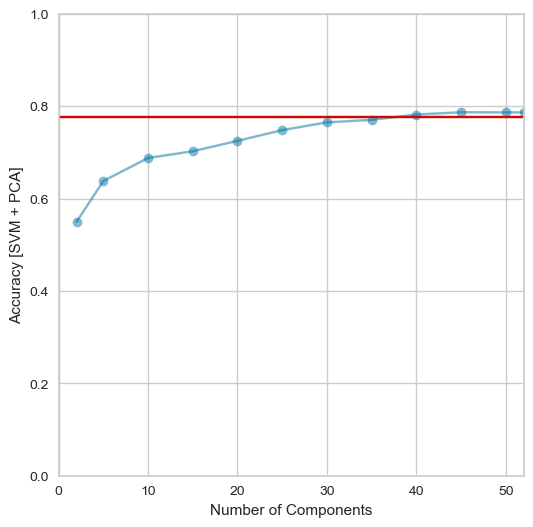

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(n_components, test_scores, "o-", alpha=0.5);
ax.plot([0, 52], [0.7768, 0.7768], "r")
ax.set_xlim([0, 52]);
ax.set_ylim([0, 1]);
ax.set_xlabel("Number of Components");
ax.set_ylabel("Accuracy [SVM + PCA]");

### 5.8 Results Summary

| Algoritm | Training Accuracy | Test Accuracy |
| --- | --- | --- |
| NMF | 40.75% | 40.24% |
| K-Means | 35.31% | 35.35% |
| Logistic Regression | 71.67% | 70.37% |
| SVM | 80.25% | 77.68% |
| Random Forest | 99.83% | <font color="red">86.21%</font> |
| Logistic Regression + PCA | 71.68% | <font color="red">70.44%</font> |
| SVM + PCA | 82.50% | <font color="red">79.40%</font> |
| Random Forest + PCA | 99.83% | 86.08% |
| Logistic Regression + NMF | 67.49% | 66.47% |
| SVM + NMF | 71.92% | 70.17% |
| Random Forest + NMF | 99.40% | 83.90% |

## 6. Discussion and Conclusion

### 6.1 Learning and Takeaways
- Unsupervised learning methods (NMF and K-Means) don't achieve acceptable classification results in this study. It is possibly due to characteristic of the dataset, since most of the columns (44 out of 55) in it are categorical, NMF and K-Means are not good at processing this kind od data. In addition, the results from dimension reduction (PCA and t-SNE) somewhat predict this because the data points don't separate well in lower dimensional space.
- In this study, the best performed model is Random Forest, it gets acurracy of 86.21% on test dataset. SVM is the next, but it is the most computationally intensive algorithms among three supervised learning models. As a linear classification method, Logistic Regression doesn't get as good results as the previous two models since the dataset is highly non-linear.
- In the beginning of the study, we state that we plan to evaluate feasibility of using unsupervised learning methods to enhance supervised learning models. By preprocessing the design matrix by PCA, accuracy of the supervised models improves (or at least hold in the case of Random Forest). SVM benefits the most from PCA, with a nearly 2% increase of accuracy in the test dataset. On the other hand, NMF doesn't provide such improvement. This outcome is anticipated due to its underperformance as a classifier during testing.. (NMF is not good at processing categorical data)
- In the case of SVM + PCA, we can achieve the same performance of untransformed data by having n_components > 37.
- Although they are underperformed, we still can observe that using unsupervised learning method as classifier provides benefit of low overfitting. Where they get comparable accuracy in both training and test dataset.

### 6.2 Issue Discussion
- According to the final result, Randorm Forest Classifier displays certain level of overfitting. (Perfect match to the training data)
- We haven't use the test.csv file from the kaggle website, the size of it is much larger (with 581011 rows of data) than train.csv. The computational performance issue of SVM will be further exaggerated in this case.

### 6.3 Possible Future Works
- Finding some unsupervised learning methods which have better capability of processing categorical data.
- A more thorough study of feature selection, for example, we can find some combination of features or externally related data to extend or replace some of the current features.
